In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import math
import seaborn as sns
import missingno

In [20]:
allFiles = glob.glob("EPM Data/*.csv")
dictionary = {}
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    for col in df.columns:
        uniq_vals = df[col].unique()
        if (("Idn" not in col) and (df.dtypes[col] == np.object) and (len(uniq_vals) >= 20)):
            df = df.drop(col,axis=1)
        if (len(uniq_vals) == 1):
            df = df.drop(col,axis=1)
        if ((len(uniq_vals) == 2) and (True in pd.isnull(uniq_vals))):
            df = df.drop(col,axis=1)
    f = file_.split("/")[1].split(".")[0]
    dictionary[f] = df

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
allFiles

['EPM Data/Comp System.csv',
 'EPM Data/Memory.csv',
 'EPM Data/System Failures.csv',
 'EPM Data/Computer.csv',
 'EPM Data/Processor.csv',
 'EPM Data/System Performance.csv',
 'EPM Data/Application Errors.csv',
 'EPM Data/Operating System.csv',
 'EPM Data/Services.csv',
 'EPM Data/Motherboard.csv',
 'EPM Data/Boot Degradation.csv',
 'EPM Data/System Drivers.csv']

In [22]:
dictionary.keys()

dict_keys(['Computer', 'System Failures', 'Operating System', 'Processor', 'Comp System', 'Motherboard', 'Application Errors', 'System Performance', 'Services', 'Memory', 'Boot Degradation', 'System Drivers'])

In [23]:
for i in dictionary:
    print(i, dictionary[i].columns)
    print("\n")
    print(dictionary[i].head(5))
    print("\n--------\n")

Computer Index(['Computer_Idn', 'Type', 'NTDomainController', 'SWNumFiles',
       'PatchDriversLastScanDate', 'ScanType', 'Manufacturer', 'Workgroup',
       'NumMultiMedFiles', 'MultiMedSize', 'MultiMedExt', 'OwnerEmail',
       'HWMonitoringType', 'MainBoardOEM_Name', 'Status', 'Agentless',
       'AGLS_status', 'CSEPCredentials_Idn', 'VirtMachID', 'VirtMachName',
       'MDMID'],
      dtype='object')


   Computer_Idn            Type NTDomainController  SWNumFiles  \
0           160  Virtual Server                PDC     73829.0   
1           162  Virtual Server                NaN    242510.0   
2           163        Portable                NaN    297708.0   
3           165        Portable                NaN    101386.0   
4           166        Portable                NaN    104396.0   

  PatchDriversLastScanDate ScanType Manufacturer Workgroup  NumMultiMedFiles  \
0                      NaN    Delta          NaN       NaN              93.0   
1                      NaN    De

In [24]:
# Plot the distribution of each feature
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    plt.rcParams.update({'font.size': 20})
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column].dropna())
            plt.xticks(rotation=25)    
        

In [25]:
%%capture cap --no-stderr
for i in dictionary:
    dataset_raw = dictionary[i] 
    print(i,"\n")
    print(dataset_raw.info())
    print("\nDescription:\n", dataset_raw.describe())
    try:
        print("\nDescription_categorical:\n", dataset_raw.describe(include=['O']).T)
    except:
        pass
    print("\n--------\n")

In [29]:
with open('output.txt', 'w') as f:
    f.write(cap.stdout)

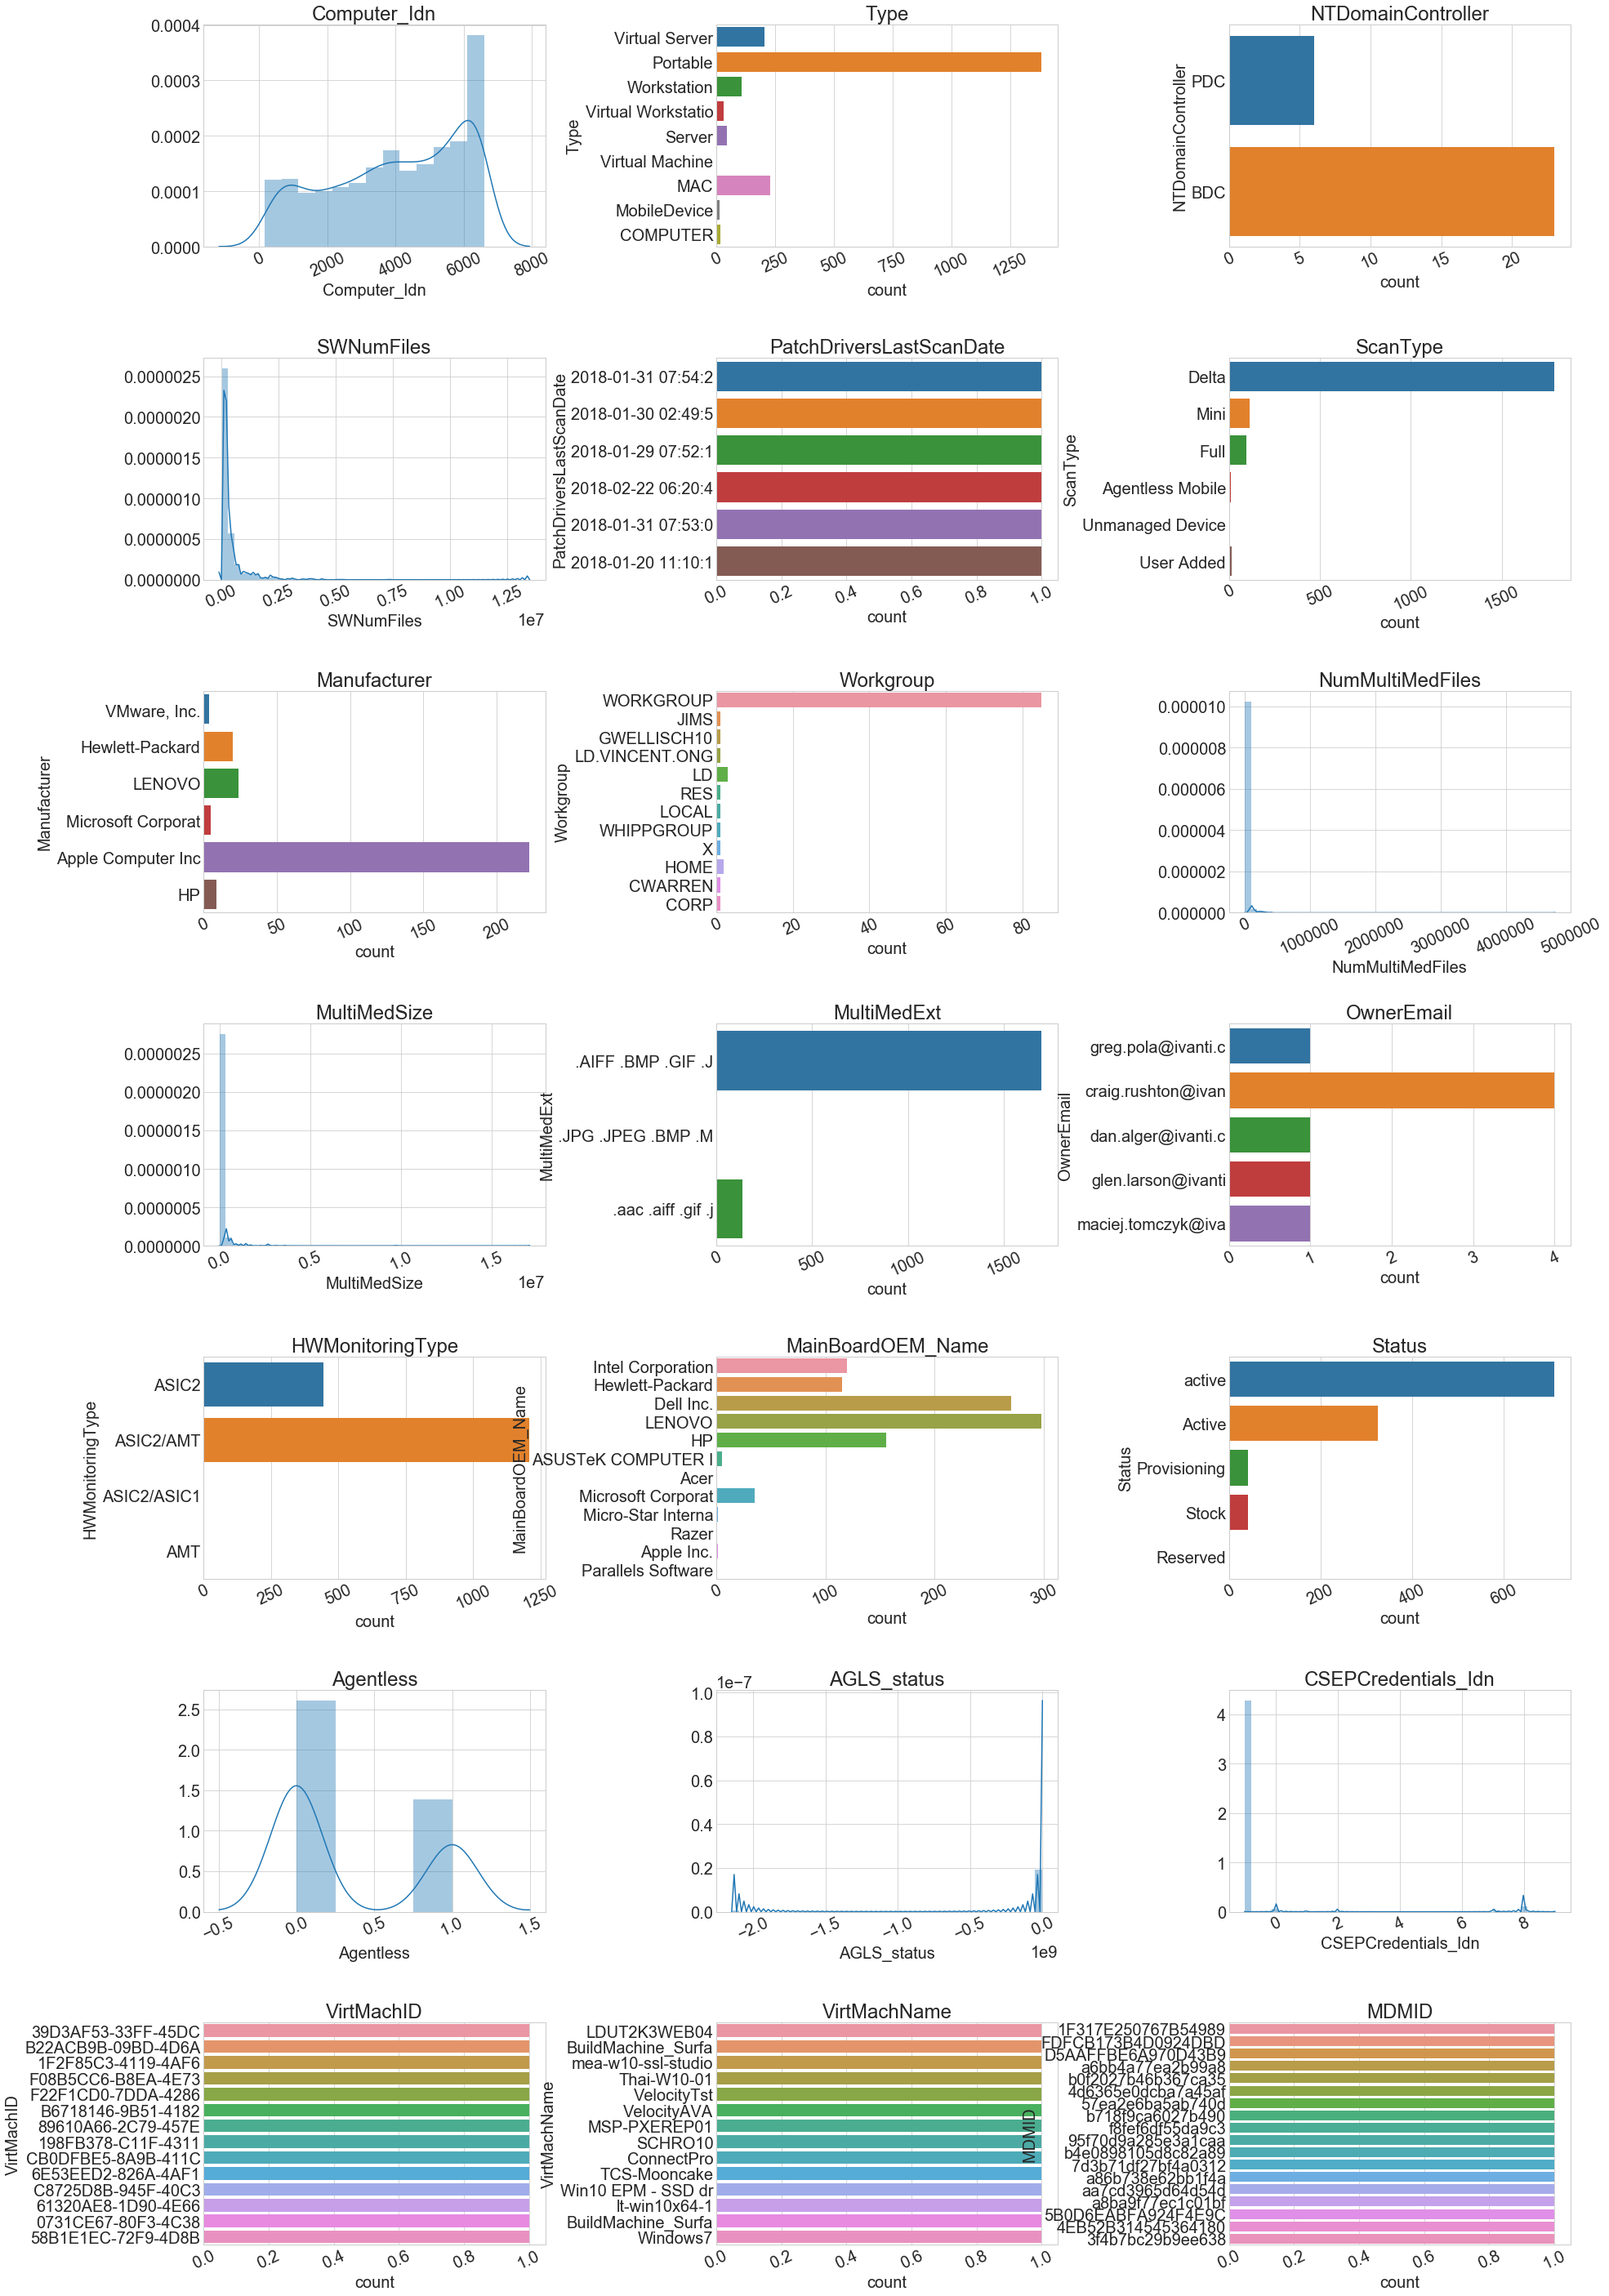

In [88]:

dataset_raw = dictionary['Computer']   
plot_distribution(dataset_raw, cols=3, width=30, height=50, hspace=0.5, wspace=0.5)
    
# # How many missing values are there in our dataset?
# missingno.matrix(dataset_raw, figsize = (30,5))

In [76]:
# dataset_raw = dictionary['Processor']  
# dataset_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 11 columns):
Computer_Idn          2040 non-null int64
ProcCount             2040 non-null int64
Stepping              1720 non-null object
Vendor                1720 non-null object
Model                 1720 non-null object
PhysAddrExt           1720 non-null object
MachineCheckArch      1720 non-null object
HyperThreading        1720 non-null object
ExternalClockSpeed    1496 non-null float64
CoresPerPkg           1942 non-null float64
ExecDisable           1720 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 175.4+ KB


In [77]:
# # Describing all the Categorical Features
# dataset_raw.describe(include=['O']).T

,count,unique,top,freq
Stepping,1720,12,3H,725
Vendor,1720,2,GenuineIntel,1702
Model,1720,10,E,951
PhysAddrExt,1720,2,Yes,1702
MachineCheckArch,1720,2,Yes,1700
HyperThreading,1720,2,Yes,1457
ExecDisable,1720,2,Yes,1718


In [78]:
# # Describing all the Numerical Features
# dataset_raw.describe()

,Computer_Idn,ProcCount,ExternalClockSpeed,CoresPerPkg
count,2040.000000,2040.000000,1496.000000,1942.000000
mean,3964.307353,1.096078,148.661765,2.721936
std,1944.112629,0.504598,518.953572,1.299912
min,160.000000,1.000000,25.000000,1.000000
25%,2388.750000,1.000000,100.000000,2.000000
50%,4157.500000,1.000000,100.000000,2.000000
75%,5734.250000,1.000000,100.000000,4.000000
max,6598.000000,8.000000,7200.000000,12.000000


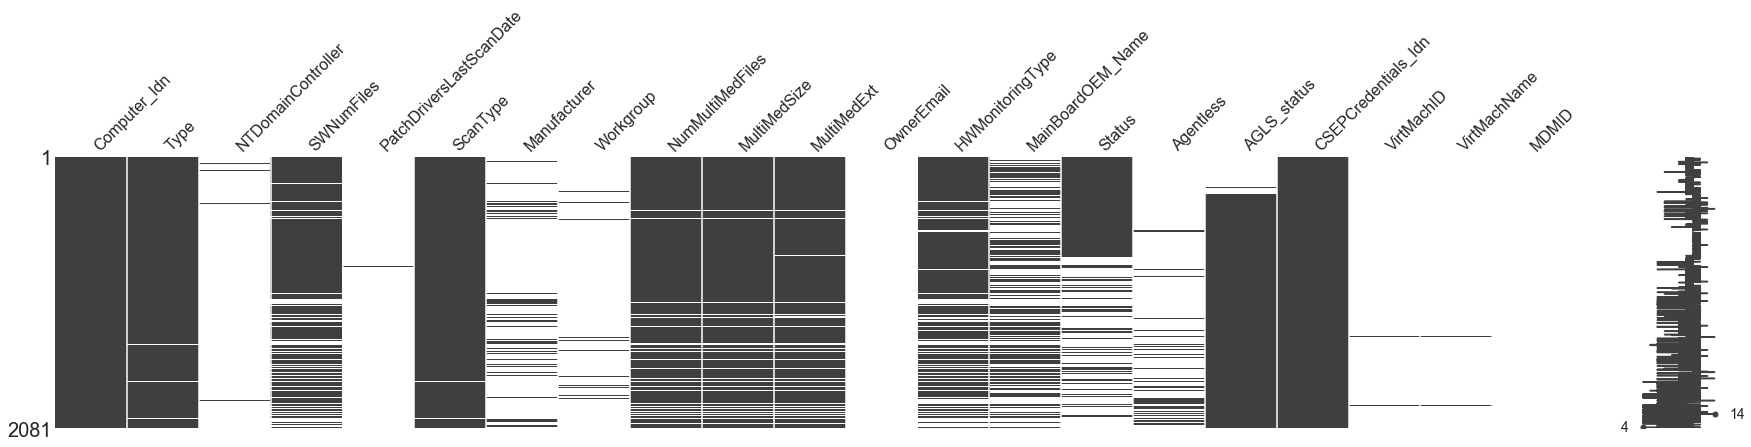

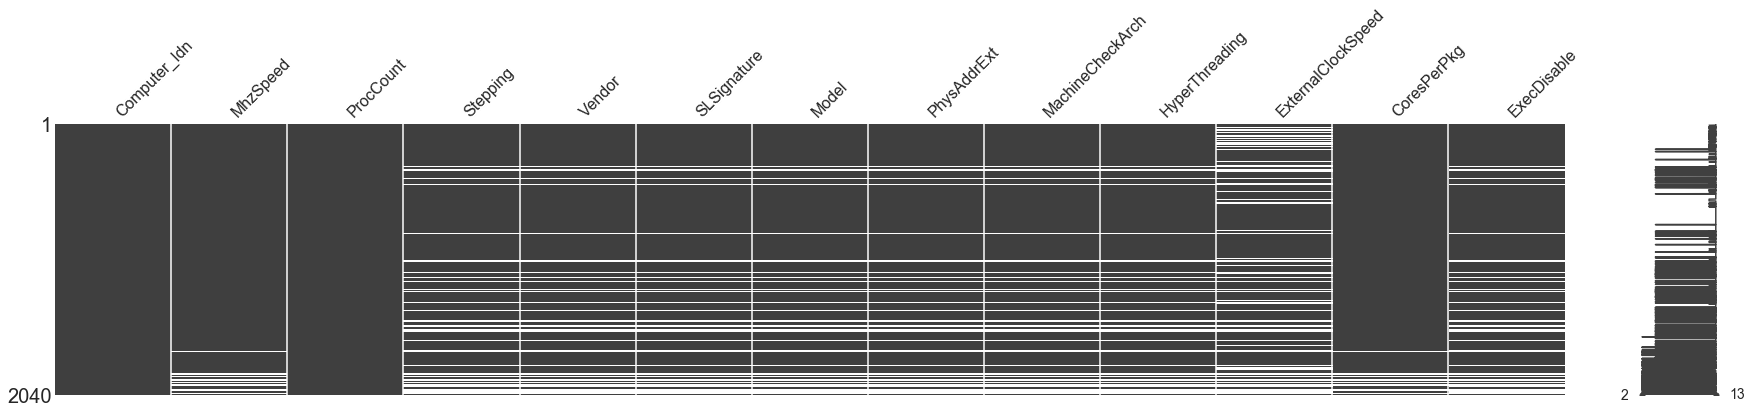

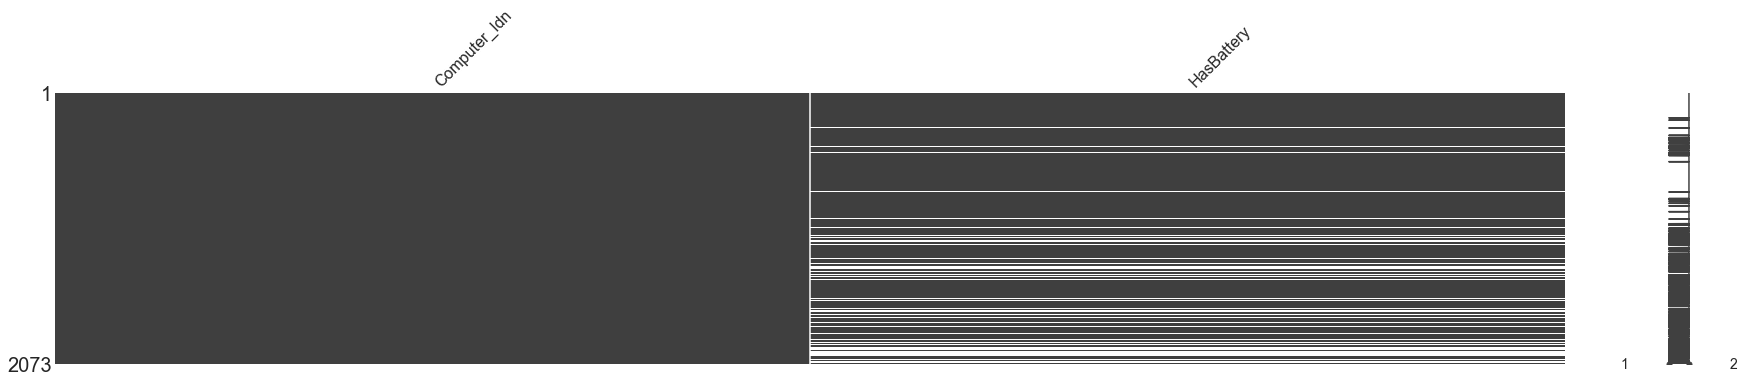

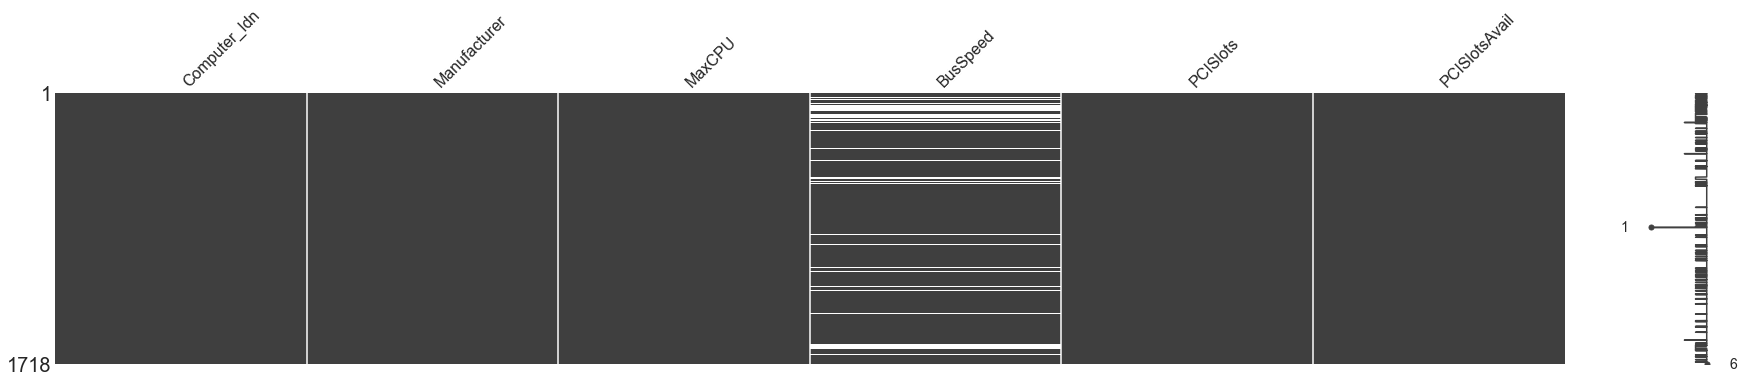

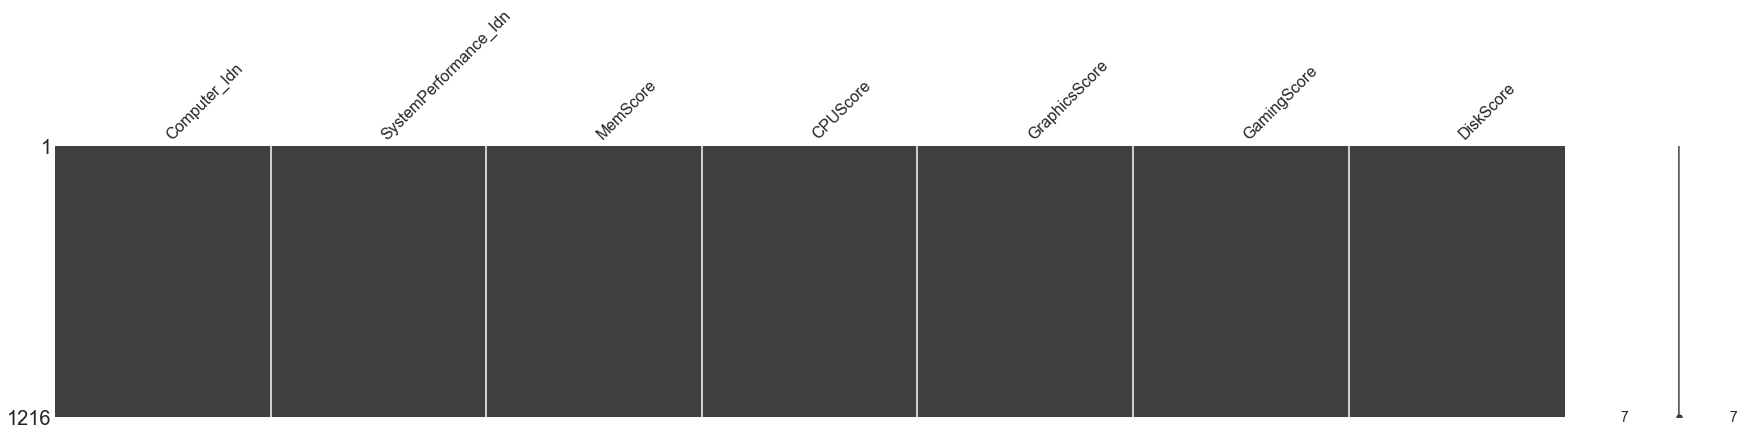

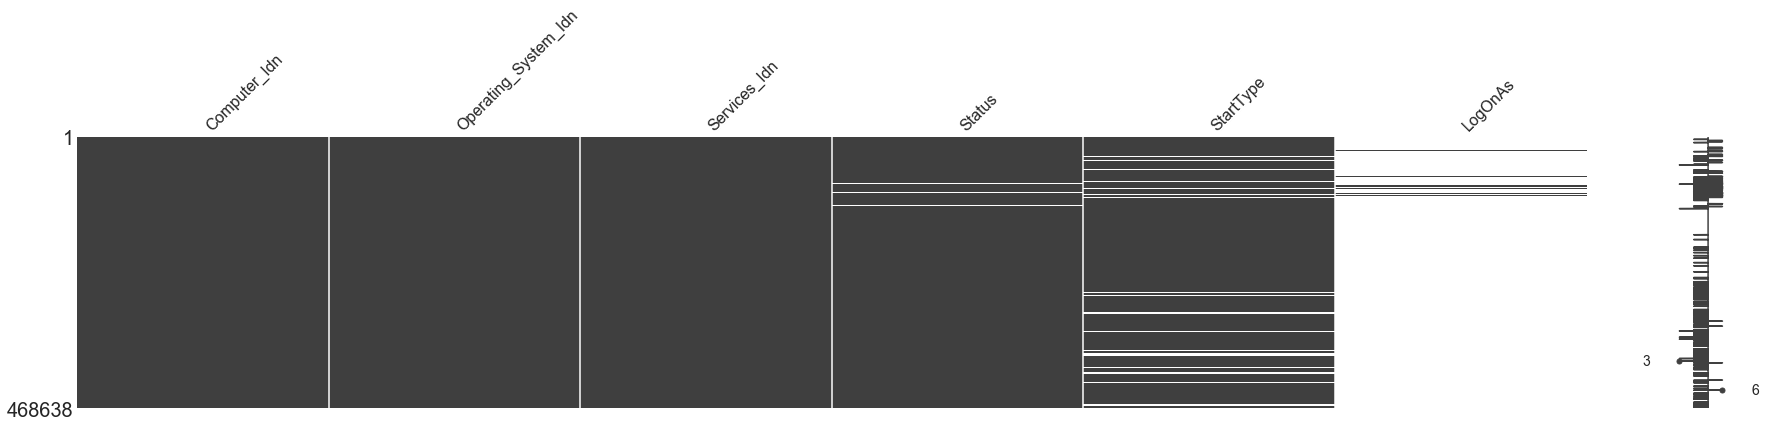

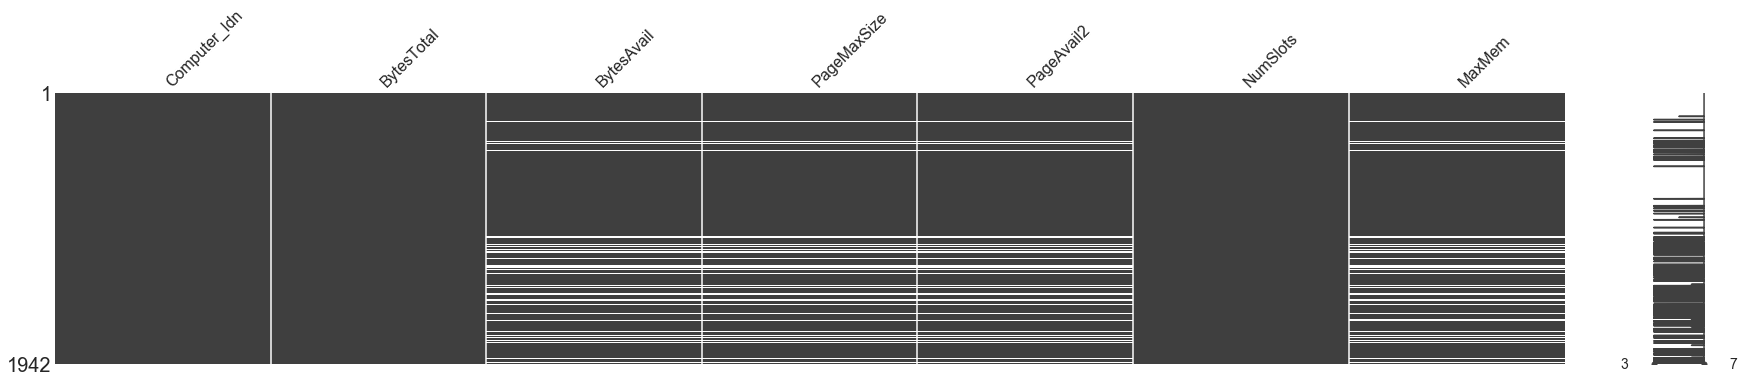

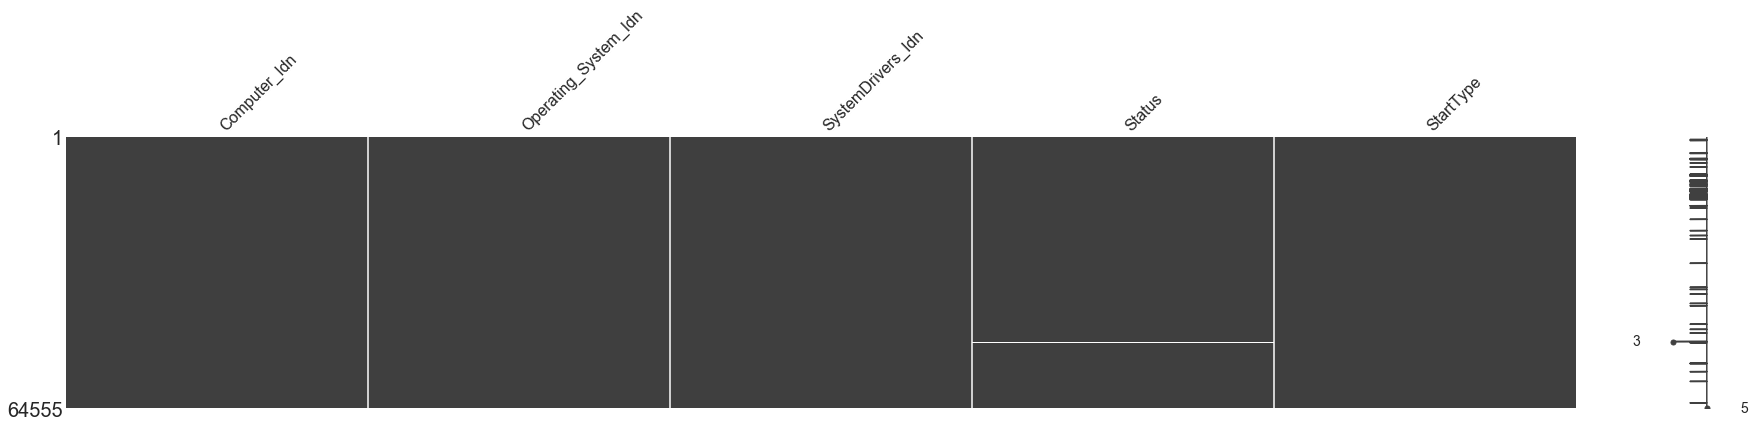

In [56]:
for i in ['Computer', 'Processor', 'Comp System', 'Motherboard', 
           'System Performance', 'Services',
           'Memory', 'System Drivers']:
    dataset_raw = dictionary[i]
    missingno.matrix(dataset_raw, figsize = (30,5))

In [46]:
temp = ['Computer', 'Processor', 'Comp System', 'Motherboard', 
           'System Performance', 'Services',
           'Memory', 'System Drivers']

resp = ['System Failures', 'Application Errors','Boot Degradation' ]

In [212]:
x = dictionary['Computer']
print(len(x['Computer_Idn'].unique()), x.shape)
x

2081 (2081, 21)


,Computer_Idn,Type,NTDomainController,SWNumFiles,PatchDriversLastScanDate,ScanType,Manufacturer,Workgroup,NumMultiMedFiles,MultiMedSize,...,OwnerEmail,HWMonitoringType,MainBoardOEM_Name,Status,Agentless,AGLS_status,CSEPCredentials_Idn,VirtMachID,VirtMachName,MDMID
0,160,Virtual Server,PDC,73829.0,NaN,Delta,NaN,NaN,93.0,36.0,...,NaN,ASIC2,Intel Corporation,active,NaN,NaN,-1,NaN,NaN,NaN
1,162,Virtual Server,NaN,242510.0,NaN,Delta,NaN,NaN,88.0,30.0,...,NaN,ASIC2,Intel Corporation,active,NaN,NaN,-1,NaN,NaN,NaN
2,163,Portable,NaN,297708.0,NaN,Delta,NaN,NaN,12247.0,232516.0,...,NaN,ASIC2/AMT,NaN,active,NaN,NaN,-1,NaN,NaN,NaN
3,165,Portable,NaN,101386.0,NaN,Delta,NaN,NaN,2912.0,61260.0,...,NaN,ASIC2/AMT,Hewlett-Packard,Active,NaN,NaN,-1,NaN,NaN,NaN
4,166,Portable,NaN,104396.0,NaN,Delta,NaN,NaN,1824.0,1133.0,...,NaN,ASIC2/AMT,Hewlett-Packard,Active,NaN,NaN,-1,NaN,NaN,NaN
5,167,Portable,NaN,101293.0,NaN,Delta,NaN,NaN,1826.0,13592.0,...,NaN,ASIC2/AMT,NaN,active,NaN,NaN,-1,NaN,NaN,NaN
6,181,Portable,NaN,121193.0,NaN,Delta,NaN,NaN,2214.0,1239.0,...,NaN,ASIC2/AMT,Hewlett-Packard,Active,NaN,NaN,-1,NaN,NaN,NaN
7,189,Portable,NaN,175213.0,NaN,Delta,NaN,NaN,3812.0,4160.0,...,NaN,ASIC2/AMT,NaN,active,NaN,NaN,-1,NaN,NaN,NaN
8,192,Workstation,NaN,158372.0,NaN,Delta,NaN,NaN,13639.0,1660.0,...,NaN,ASIC2,NaN,active,NaN,NaN,-1,NaN,NaN,NaN
9,199,Portable,NaN,436912.0,NaN,Delta,NaN,NaN,14052.0,14804.0,...,NaN,ASIC2/AMT,NaN,active,NaN,NaN,-1,NaN,NaN,NaN


In [209]:
y = dictionary['System Failures']
print(len(y['SystemFailures_Idn'].unique()), y.shape)
y

391 (391, 4)


,Computer_Idn,SystemFailures_Idn,Count30Day,Count90Day
0,165,2745,0,1
1,189,2308,0,0
2,192,102,1,5
3,199,2570,1,1
4,201,2668,1,5
5,205,107,2,2
6,272,1085,0,0
7,289,108,0,0
8,290,1503,0,0
9,302,2408,0,0


In [192]:
d = dictionary['System Failures'].join(dictionary['System Drivers'].set_index('Computer_Idn'), on='Computer_Idn')

In [193]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13994 entries, 0 to 390
Data columns (total 8 columns):
Computer_Idn            13994 non-null int64
SystemFailures_Idn      13994 non-null int64
Count30Day              13994 non-null int64
Count90Day              13994 non-null int64
Operating_System_Idn    13993 non-null float64
SystemDrivers_Idn       13993 non-null float64
Status                  13881 non-null object
StartType               13974 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 984.0+ KB


In [198]:
d

,Computer_Idn,SystemFailures_Idn,Count30Day,Count90Day,Operating_System_Idn,SystemDrivers_Idn,Status,StartType
0,165,2745,0,1,141.0,4700.0,Stopped,Disabled
0,165,2745,0,1,141.0,4701.0,Running,System Start
0,165,2745,0,1,141.0,4702.0,Stopped,Manual
0,165,2745,0,1,141.0,4703.0,Running,Manual
0,165,2745,0,1,141.0,4704.0,Running,Boot Start
0,165,2745,0,1,141.0,4705.0,Stopped,Manual
0,165,2745,0,1,141.0,4706.0,Running,Boot Start
0,165,2745,0,1,141.0,4707.0,Stopped,Manual
0,165,2745,0,1,141.0,4708.0,Running,Auto
0,165,2745,0,1,141.0,4709.0,Stopped,Manual


In [170]:
d.columns

Index(['Computer_Idn', 'SystemFailures_Idn', 'Count30Day', 'Count90Day',
       'Operating_System_Idn', 'SystemDrivers_Idn', 'Status', 'StartType'],
      dtype='object')

In [171]:
d = d[['Count30Day', 'Count90Day', 'Operating_System_Idn', 'SystemDrivers_Idn', 'Status', 'StartType']]

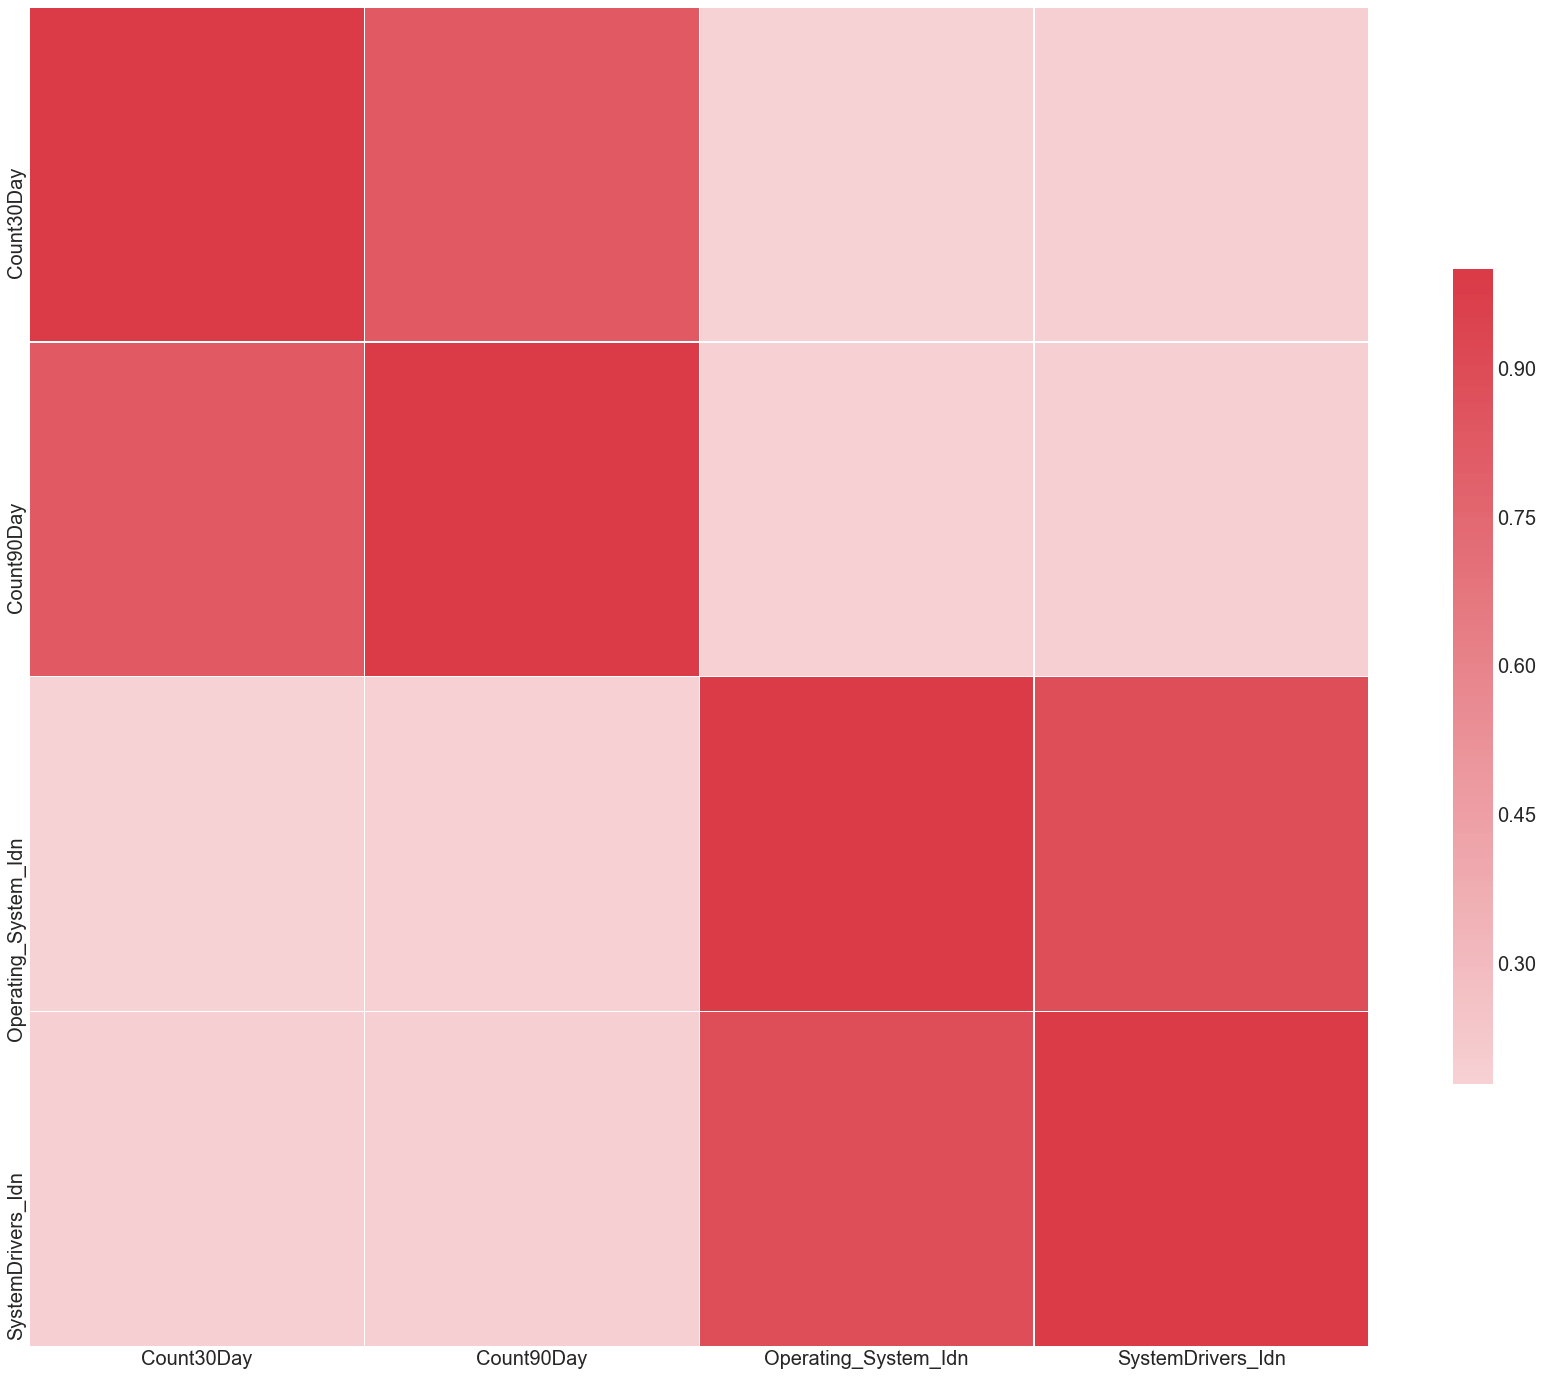

In [172]:
cor = d.corr()
plt.rcParams.update({'font.size': 20})
f, ax = plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(cor, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

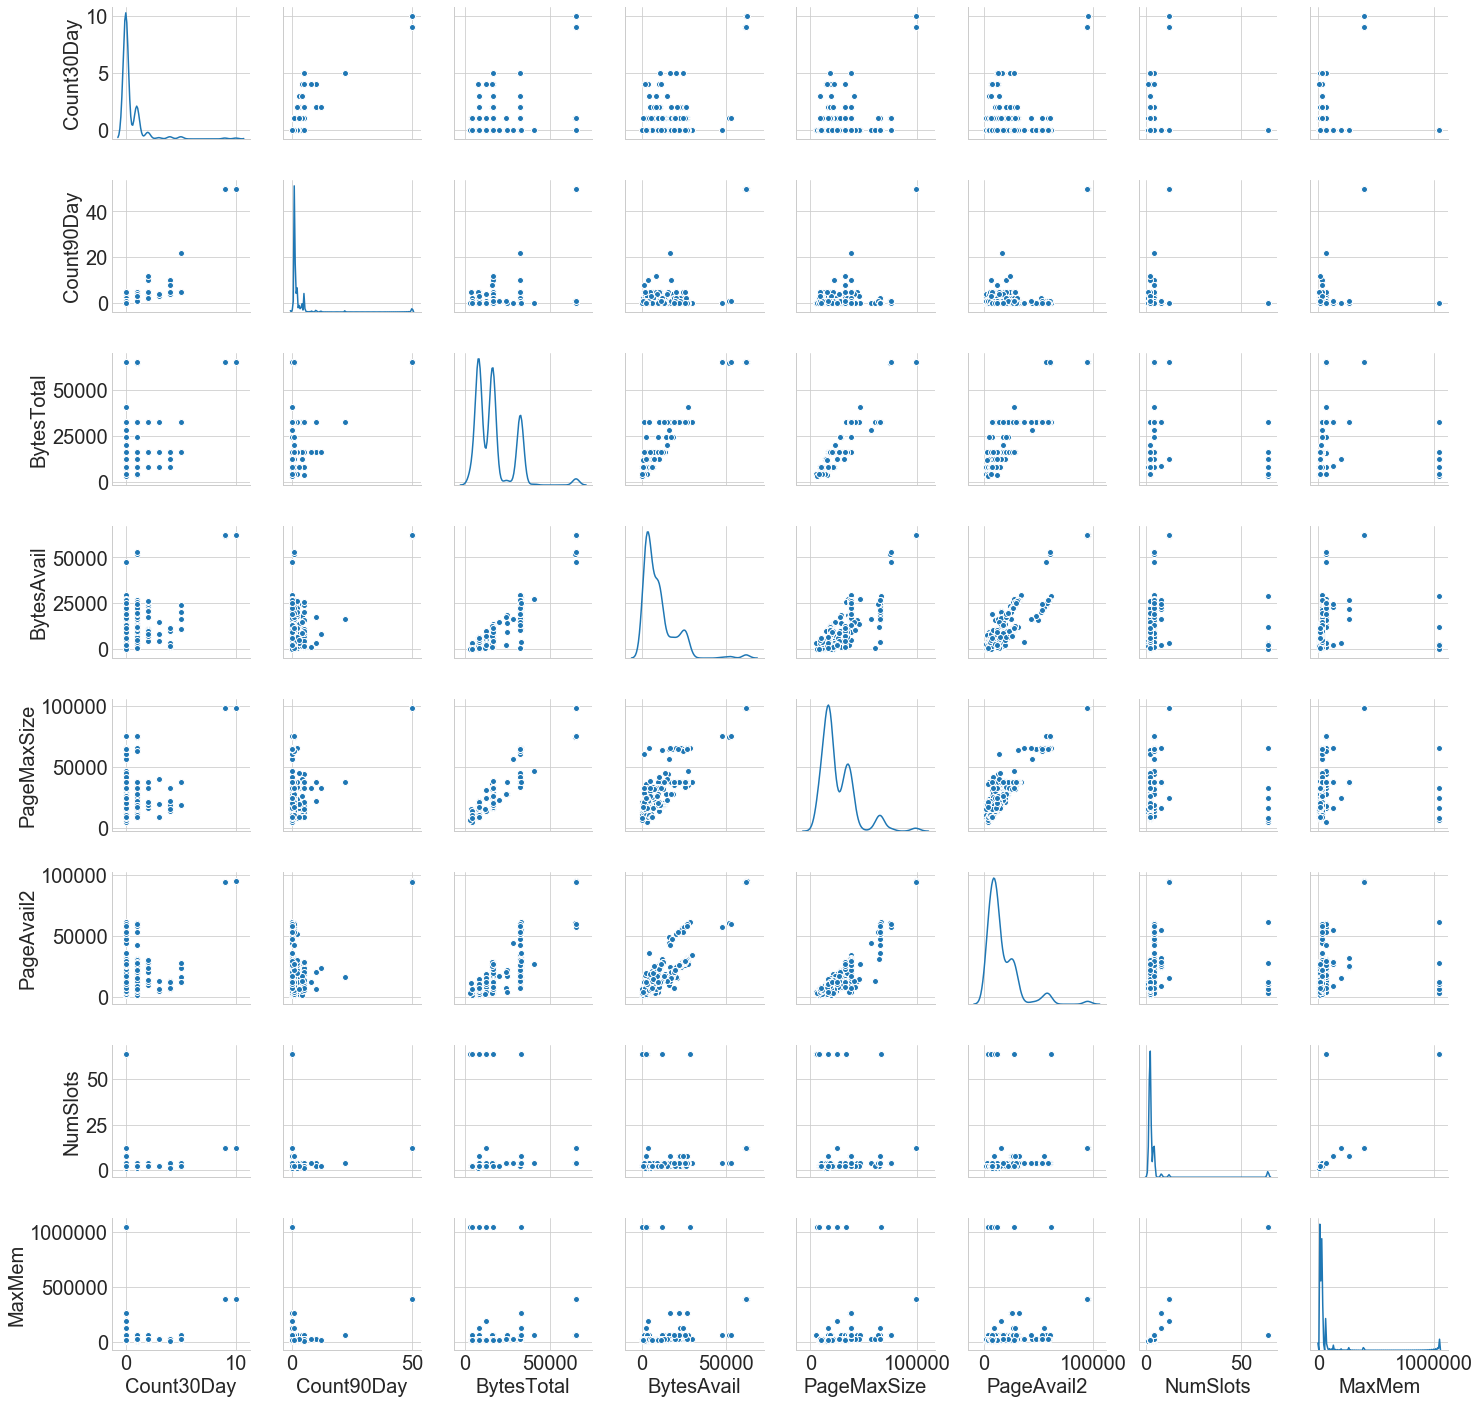

In [154]:
plt.figure(figsize=(14, 14))
plt.rcParams.update({'font.size': 20})
sns.pairplot(d, diag_kind='kde');

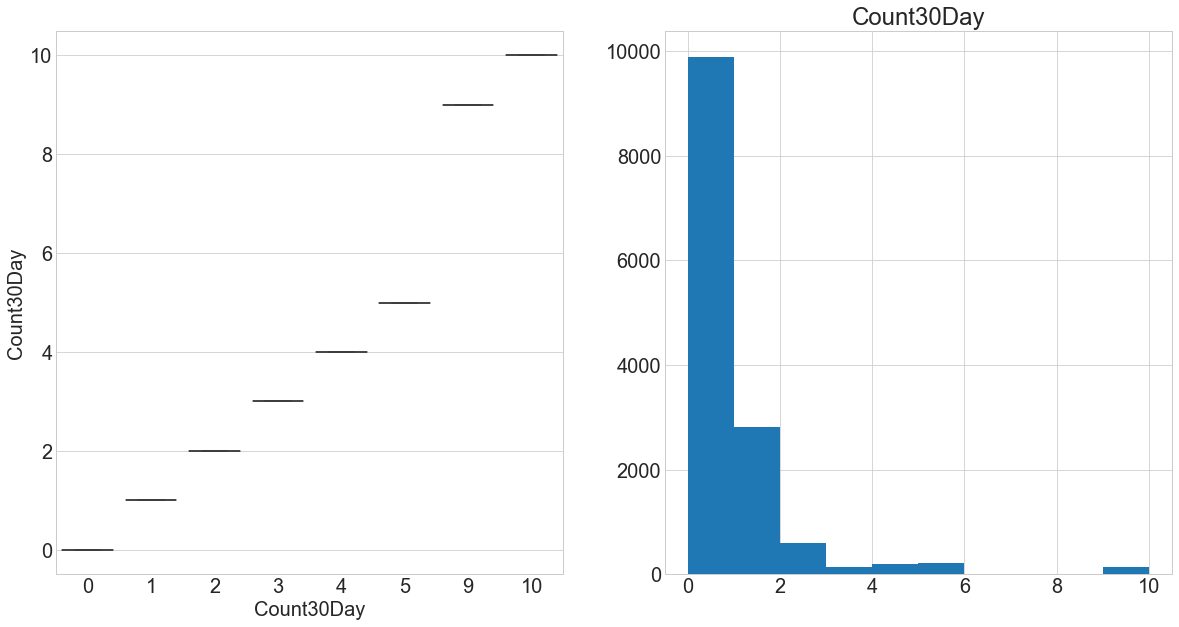

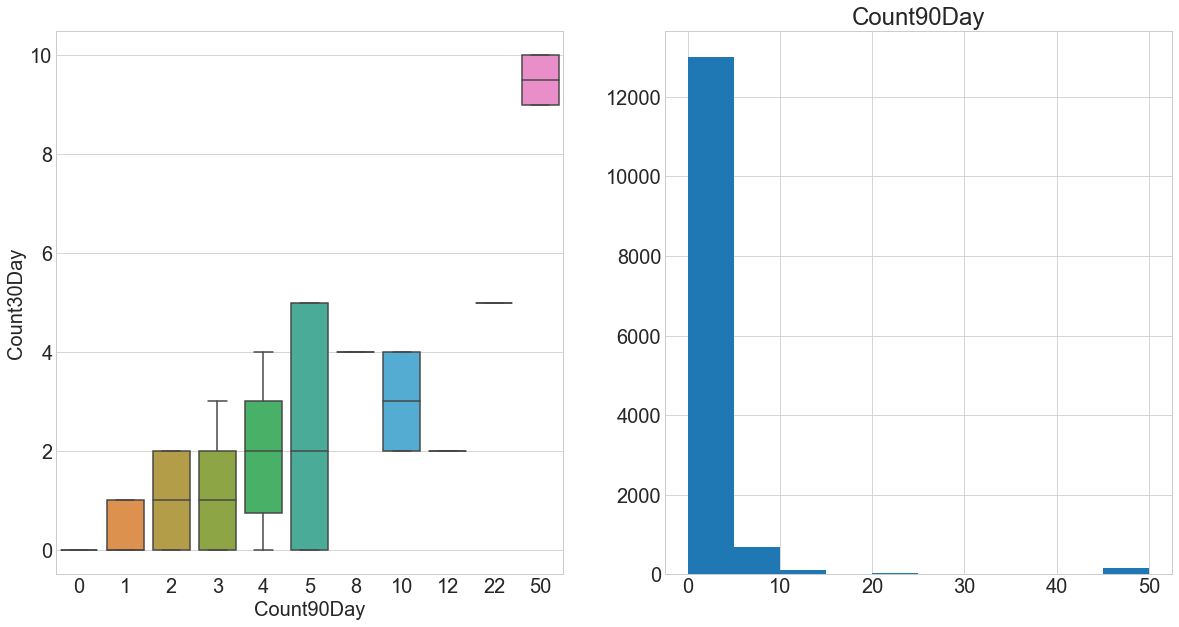

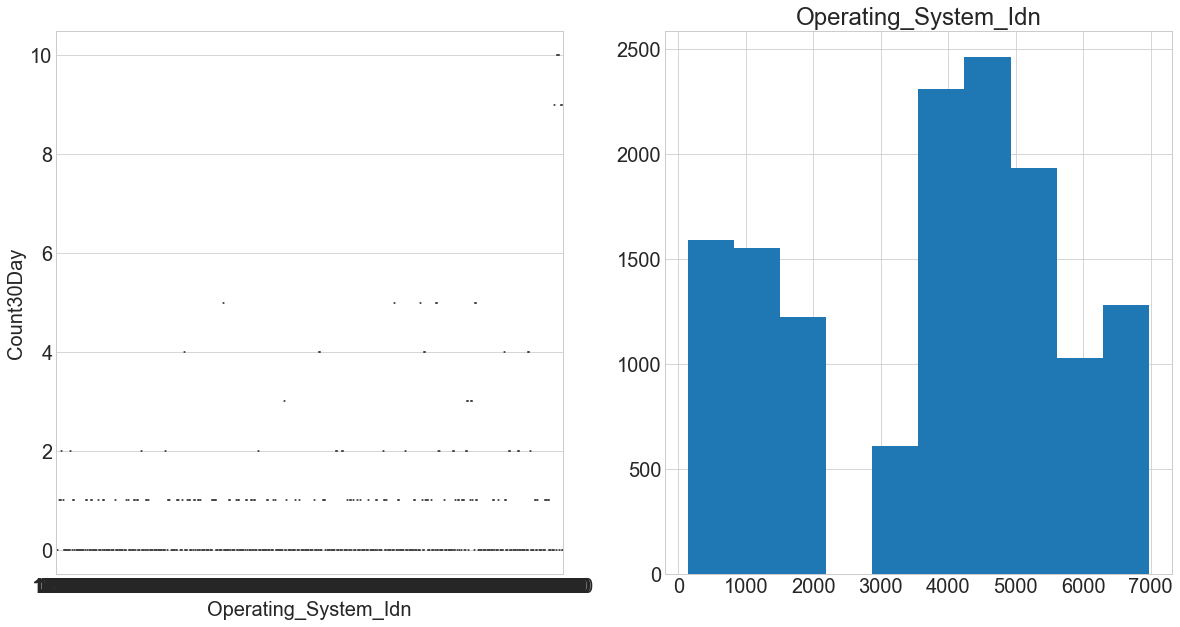

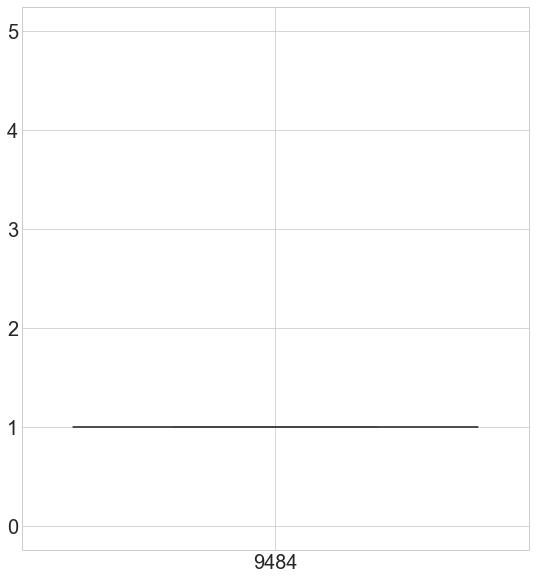

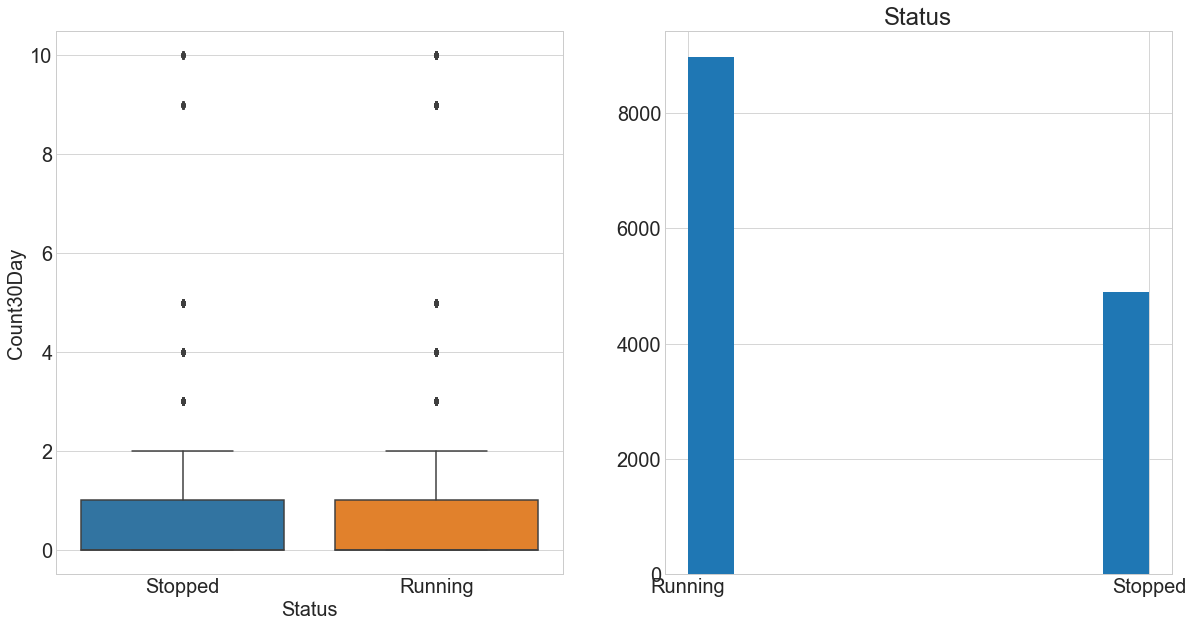

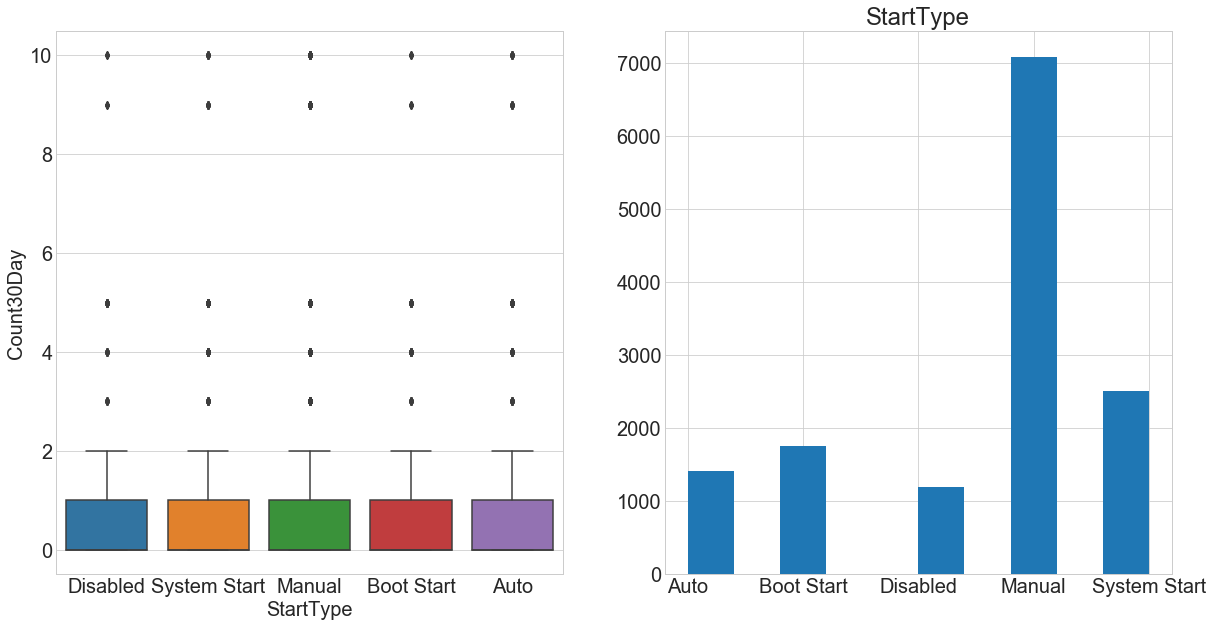

In [173]:
for i in d.columns:
    try:
        fig = plt.figure(figsize = (20,10))
        plt.subplot(1,2,1)
        sns.boxplot( x=d[i], y=d["Count30Day"])
        plt.subplot(1,2,2)
        plt.hist(d[i].dropna())
        plt.title(i)
    except:
        pass

In [142]:
from pomegranate import *

In [26]:
model = BayesianNetwork.from_samples(d, algorithm='exact')

In [27]:
print(model)

4723285640:{
    "distribution" : {
        "parameters" : [
            {
                "4" : 0.01278772378516624,
                "3" : 0.0076726342710997444,
                "9" : 0.005115089514066497,
                "2" : 0.03836317135549872,
                "5" : 0.01278772378516624,
                "10" : 0.005115089514066497,
                "1" : 0.18925831202046037,
                "0" : 0.7289002557544757
            }
        ],
        "name" : "DiscreteDistribution",
        "class" : "Distribution",
        "dtype" : "int",
        "frozen" : false
    },
    "class" : "State",
    "name" : "0",
    "weight" : 1.0
}{
    "distribution" : {
        "parameters" : [
            {
                "1" : 0.9769820971867008,
                "6" : 0.0025575447570332483,
                "4" : 0.005115089514066497,
                "2" : 0.015345268542199489
            }
        ],
        "name" : "DiscreteDistribution",
        "class" : "Distribution",
        "dtype" : "int

In [42]:
print(model.keymap)

[{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 9: 6, 10: 7}
 {1: 0, 2: 1, 4: 2, 6: 3}
 {'4H': 5, '1H': 0, '5H': 6, '9H': 1, '2H': 2, 'AH': 3, '7H': 7, '3H': 4}]


In [57]:
model.plot()

ValueError: must have pygraphviz installed for visualization

In [58]:
import pygraphviz

ImportError: No module named 'pygraphviz'

In [219]:
app_error = pd.read_csv('EPM Data/Application Errors.csv')
app_error

,Computer_Idn,ApplicationErrors_Idn,AppName,AppVersion,AppDate,ModuleName,ModuleVersion,ModuleDate,AppPath,ExceptionCode,LastDate,Count30Day,Count90Day
0,162,93118,tmcsvc.exe,11.0.0.1089,2018-04-19 09:48:55.000,tmcdll.dll,11.0.0.1098,2018-04-30 12:22:05.000,C:\Program Files (x86)\LANDesk\LDClient\tmcsvc...,c0000409,2018-07-21 16:09:14.000,1.0,1.0
1,163,85048,EvtEng.exe,20.20.2.0,2017-12-20 06:32:50.000,EvtEng.exe,20.20.2.0,2017-12-20 06:32:50.000,C:\Program Files\Intel\WiFi\bin\EvtEng.exe,c0000005,2018-05-28 01:56:33.000,0.0,1.0
2,163,88257,EXCEL.EXE,16.0.8431.2270,2018-06-07 22:17:48.000,unknown,0.0.0.0,2018-06-07 22:17:48.000,C:\Program Files (x86)\Microsoft Office\Root\O...,c0000005,2018-07-28 16:22:04.000,3.0,4.0
3,163,84790,issuser.exe,10.0.1.31,2016-02-19 08:32:56.000,SSLEAY32MTFIPS.dll,1.0.1.16,2015-10-21 15:04:50.000,C:\PROGRA~2\LANDesk\LDClient\issuser.exe,c0000005,2018-08-07 04:42:15.000,7.0,10.0
4,163,81267,ldav.exe,10.0.1.54,2016-03-29 14:15:51.000,ldav.exe,10.0.1.54,2016-03-29 14:15:51.000,C:\Program Files (x86)\LANDesk\LDClient\antivi...,40000015,2018-07-23 06:45:24.000,1.0,2.0
5,163,10580,MySQLNotifier.exe,1.1.7.0,2016-07-28 18:51:37.000,KERNELBASE.dll,6.1.7601.24150,2018-05-28 20:25:41.000,C:\Program Files (x86)\MySQL\MySQL Notifier 1....,e0434352,2018-08-07 04:02:33.000,3.0,9.0
6,163,93174,proxyhost.exe,10.0.0.435,2016-03-08 13:19:52.000,proxyhost.exe,10.0.0.435,2016-03-08 13:19:52.000,C:\Program Files (x86)\LANDesk\Shared Files\pr...,c0000005,2018-07-22 07:57:26.000,1.0,1.0
7,163,94086,rcgui.exe,10.0.0.271,2015-12-16 13:48:06.000,ntdll.dll,6.1.7601.24150,2018-05-28 20:22:56.000,C:\PROGRA~2\LANDesk\LDClient\rcgui.exe,c0000005,2018-07-26 08:52:19.000,1.0,1.0
8,163,78940,rsession.exe,0.99.903.0,NaN,rsession.exe,0.99.903.0,2018-03-30 19:37:07.000,C:\Program Files\RStudio\bin\x64\rsession.exe,40000015,2018-07-31 16:51:40.000,1.0,1.0
9,163,94085,WildPulseEngine.exe,0.0.0.0,2018-06-25 03:52:38.000,KERNELBASE.dll,6.1.7601.24150,2018-05-28 20:35:17.000,C:\Program Files\Ivanti\Ivanti Cloud Agent\UNO...,e0434352,2018-07-26 07:03:21.000,1.0,1.0


In [238]:
app_error.groupby('AppName')['Count30Day'].agg(np.sum).sort_values(ascending = False).head(50)

AppName
lmhost.exe                      430279.0
LDDellOMCI.exe                  222855.0
trout.exe                        55647.0
ioc.exe                           8172.0
chrome.exe                        6161.0
tmcsvc.exe                        4680.0
proxyhost.exe                     2536.0
issuser.exe                       1844.0
SelfElectController.exe           1669.0
WildPulseEngine.exe               1638.0
SDService.exe                     1613.0
hpCMSrv.exe                       1053.0
MBBScanner.exe                     748.0
Uno.PatchContent.Service.exe       746.0
GM.IS.WEB.exe                      743.0
SearchUI.exe                       742.0
wmiprvse.exe                       667.0
MicrosoftEdgeCP.exe                639.0
Explorer.EXE                       544.0
OUTLOOK.EXE                        398.0
IEXPLORE.EXE                       396.0
omsvchost.exe                      369.0
splunk-optimize.exe                367.0
ldHPSensors.exe                    364.0
STAgent.

In [237]:
app_error[app_error.Computer_Idn == 3125]

,Computer_Idn,ApplicationErrors_Idn,AppName,AppVersion,AppDate,ModuleName,ModuleVersion,ModuleDate,AppPath,ExceptionCode,LastDate,Count30Day,Count90Day
3674,3125,80598,lmhost.exe,8.5.0.22,2017-04-10 09:04:32.000,scan.dll,3.0.3.794,2016-02-08 09:55:59.000,C:\Program Files\HEAT Software\EMSSAgent\00\lm...,c0000417,2018-08-20 22:16:44.000,12988.0,12988.0
